# Week 9: Linear Regression!

## DSUA111: Data Science for Everyone, NYU, Fall 2020

### TA Jeff, `jpj251@nyu.edu`

* This slideshow: https://jjacobs.me/dsua111-sections/week-09
* All materials: https://github.com/jpowerj/dsua111-sections

## Overview

0. Regression in General: What it is and what it isn't
1. Ordinary Least Squares (OLS) Regression

## This is the most important topic in the course, practically speaking

* All the fancy machine learning / AI / neural net methods, they are all glorified regressions

## The "best fit" line: make sure you **check your intuition**!

<center>
<img src="pca_vs_regression.png" style="width:66.6%;">
</center>

* When given this sort of scatterplot (without any lines superimposed) and asked to draw the regression line of $y$ on $x$, students tend to draw the principal component line shown in Figure 4.2a. However, **for the goal of predicting $y$ from $x$**, or for estimating the average of $y$ for any given value of $x$, **the regression line is in fact better**--even if it does not appear so at first.

* The superiority of the regression line for estimating the average of $y$ given $x$ can be seen from a careful study of Figure 4.2.

## The "best fit" line: make sure you **check your intuition**!

<center>
<img src="pca_vs_regression.png" style="width:66.6%;">
</center>

* For example, consider the points at the **extreme left** of either graph. They all lie above the principal components line but are roughly half below and half above the regression line. Thus, the principal component line **underpredicts $y$ for low values of $x$**.

* Similarly, a careful study of the right side of each graph shows that the principal component line **overpredicts $y$ for high values of $x$**.

* In contrast, the regression line again gives unbiased predictions, in the sense of **going through the average value of $y$ given $x$**.

(Gelman and Hill, "Data Analysis Using Regression and Multilevel/Hierarchical Models", 58)

## Regression Overview

<center>
<img src="regression.png" style="width:80%;">
</center>

(Lecture 16.1, Slide 7)

## Ordinary Least Squares (OLS) Regression: The *Model*

<center>
<img src="ols.png" style="width:80%;">
</center>

This is the non-"fitted" model, since we don't yet know the precise values of $a$ or $b$

## Ordinary Least Squares (OLS) Regression: The *Fitted* Model

<center>
<img src="ols_fitted.png" style="width:80%;">
</center>

By estimating the parameters of our model using the data in the dataset, we obtain $a = 23.4$ and $b = -1.59$

## The "full" OLS model

<center>
<img src="ols_eqn.png" style="width:80%;">
</center>

(Lecture 16.2, Slide 19)

## Regression in Python

In [2]:
import statsmodels.formula.api as smf

## The Dataset: Colonial History and Life Expectancy

In [4]:
import pandas as pd
import numpy as np
colonial_df = pd.read_csv("colonial_life_expectancy.csv")

In [5]:
colonial_df

,country,ind_date,yrs_since_ind,year,life_exp
0,Afghanistan,191908,97,2016,62.7
1,Albania,191307,103,2016,76.4
2,Algeria,196207,54,2016,76.4
3,Angola,197511,41,2016,62.6
4,Antigua and Barbuda,198111,35,2016,75.0
...,...,...,...,...,...
178,Venezuela,183001,186,2016,74.1
179,Vietnam,195407,62,2016,76.3
180,Yemen,196711,49,2016,65.3
181,Zambia,196410,52,2016,62.3


## Exploratory Data Analysis

* NOTE: YOU ACTUALLY DO NEED TO DO THIS IRL...

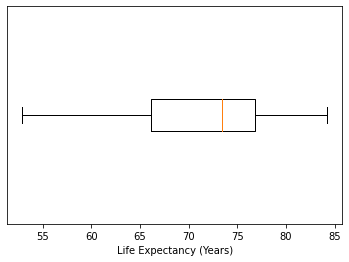

In [19]:
import matplotlib.pyplot as plt
plt.boxplot(colonial_df['life_exp'], vert=False)
plt.xlabel("Life Expectancy (Years)")
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.tick_params.html
plt.tick_params(axis='y', which='both', left=False, labelleft=False)
plt.show()

## Outliers?

In [23]:
colonial_df.sort_values(by='life_exp')

,country,ind_date,yrs_since_ind,year,life_exp
94,Lesotho,196610,50,2016,52.9
31,Central African Republic,196010,56,2016,53.0
145,Sierra Leone,196104,55,2016,53.1
32,Chad,196008,56,2016,54.3
39,Côte d'Ivoire,196008,56,2016,54.6
...,...,...,...,...,...
146,Singapore,196508,51,2016,82.9
7,Australia,190101,115,2016,82.9
154,Spain,147901,537,2016,83.1
159,Switzerland,129108,725,2016,83.3


(btw, "Lesotho" is pronounced "Leh-Soo-Too"... fun fact)

## Scatterplottin

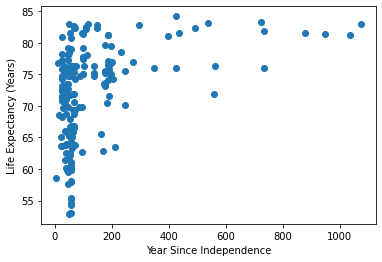

In [25]:
plt.scatter(colonial_df['yrs_since_ind'], colonial_df['life_exp'])
plt.xlabel("Year Since Independence")
plt.ylabel("Life Expectancy (Years)")
plt.show()

(sidebar: for variables with skewed distributions like years since independence, you really should take the log to "de-skew" them)

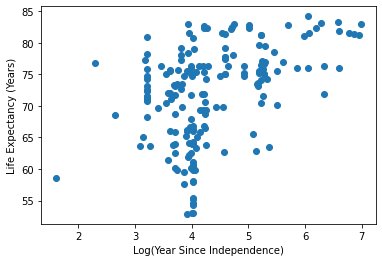

In [65]:
plt.scatter(np.log(colonial_df['yrs_since_ind']), colonial_df['life_exp'])
plt.xlabel("Log(Year Since Independence)")
plt.ylabel("Life Expectancy (Years)")
plt.show()

## Before we estimate the model, remember what our hypotheses are!

* $H_0$: Changes in the independent variable have no effect on the dependent variable
    * i.e., $\beta_1 = 0$
    * So, in our case: **number of years since independence** has **no effect** on **life expectancy**
* $H_A$: Changes in the independent variable have some (nonzero) effect on the dependent variable
    * i.e., $\beta_1 \neq 0$
    * In our case: **number of years since independence** has an **effect** on **life expectancy**
* (Remember our model: $Y_i = \beta_0 + \beta_1X_i + \varepsilon_i$)
    * $\textsf{LifeExpectancy}_i = \beta_0 + \beta_1\textsf{YrsSinceIndependence}_i + \varepsilon_i$

In [28]:
results = smf.ols('life_exp ~ yrs_since_ind', data=colonial_df).fit()

(Why do we have to add `.fit()`?)

In [79]:
summary = results.summary()
summary.extra_txt = None; summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               life_exp   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     35.52
Date:                Tue, 10 Nov 2020   Prob (F-statistic):           1.29e-08
Time:                        00:23:41   Log-Likelihood:                -614.72
No. Observations:                 183   AIC:                             1233.
Df Residuals:                     181   BIC:                             1240.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        69.5870      0.636    109.483      0.000      68.333      70.841
yrs_since_ind     0.0169      0.003      5.960      0.000       0.011       0.022
==============================================================================
Omnibus:                        8.399   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                8.177
Skew:                          -0.470   Prob(JB):                       0.0168
Kurtosis:                       2.564   Cond. No.                         275.
==============================================================================
"""

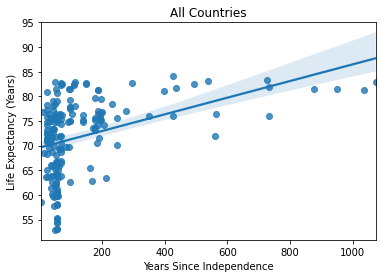

In [58]:
import seaborn as sns
sns.regplot(x='yrs_since_ind', y='life_exp', data=colonial_df)
plt.title("All Countries")
plt.xlabel("Years Since Independence")
plt.ylabel("Life Expectancy (Years)")
plt.show()

## Appendix I: Removing Outliers

* Sketchy, but in this case we have a historical reason for removing outliers: we can revise our population of interest to be *countries that achieved independence since the 1648 [Treaty of Westphalia](https://en.wikipedia.org/wiki/Peace_of_Westphalia)*, which (long story short) inaugurated the era of the sovereign nation-state

In [40]:
tw_df = colonial_df[colonial_df['yrs_since_ind'] < 368].copy()

In [43]:
print("Number of countries before dropping outliers: " + str(len(colonial_df)))
print("Number of countries after dropping outliers: " + str(len(tw_df)))

Number of countries before dropping outliers: 183
Number of countries after dropping outliers: 168


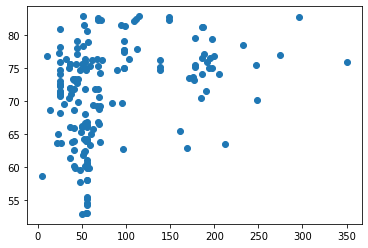

In [46]:
plt.scatter(tw_df['yrs_since_ind'], tw_df['life_exp'])
plt.show()

In [44]:
results_tw = smf.ols('life_exp ~ yrs_since_ind', data=tw_df).fit()

In [80]:
tw_summary = results_tw.summary()
tw_summary.extra_txt = None; tw_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               life_exp   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     20.61
Date:                Tue, 10 Nov 2020   Prob (F-statistic):           1.08e-05
Time:                        00:24:07   Log-Likelihood:                -565.18
No. Observations:                 168   AIC:                             1134.
Df Residuals:                     166   BIC:                             1141.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        67.8297      0.889     76.285      0.000      66.074      69.585
yrs_since_ind     0.0387      0.009      4.539      0.000       0.022       0.056
==============================================================================
Omnibus:                        7.032   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                6.257
Skew:                          -0.399   Prob(JB):                       0.0438
Kurtosis:                       2.493   Cond. No.                         171.
==============================================================================
"""

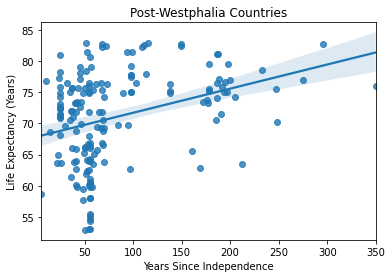

In [81]:
import seaborn as sns
sns.regplot(x='yrs_since_ind', y='life_exp', data=tw_df)
plt.title("Post-Westphalia Countries")
plt.xlabel("Years Since Independence")
plt.ylabel("Life Expectancy (Years)")
plt.show()

## Appendix II: ...You really should log the skewed variables

In [82]:
colonial_df['log_yrs_since_ind'] = colonial_df['yrs_since_ind'].apply(np.log)

In [83]:
results_log = smf.ols('life_exp ~ log_yrs_since_ind', data=colonial_df).fit()

In [84]:
summary_log = results_log.summary()
summary_log.extra_txt = None; summary_log

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               life_exp   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     42.53
Date:                Tue, 10 Nov 2020   Prob (F-statistic):           6.74e-10
Time:                        00:24:32   Log-Likelihood:                -611.80
No. Observations:                 183   AIC:                             1228.
Df Residuals:                     181   BIC:                             1234.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            56.1455      2.452     22.897      0.000      51.307      60.984
log_yrs_since_ind     3.5956      0.551      6.521      0.000       2.508       4.684
==============================================================================
Omnibus:                        8.079   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                8.422
Skew:                          -0.505   Prob(JB):                       0.0148
Kurtosis:                       2.712   Cond. No.                         22.5
==============================================================================
"""

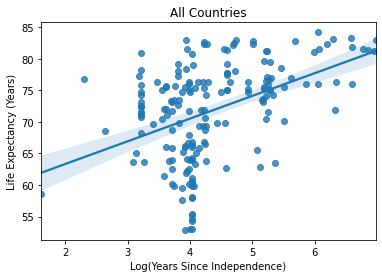

In [85]:
import seaborn as sns
sns.regplot(x='log_yrs_since_ind', y='life_exp', data=colonial_df)
plt.title("All Countries")
plt.xlabel("Log(Years Since Independence)")
plt.ylabel("Life Expectancy (Years)")
plt.show()

(and now with just the post-Westphalia countries)

In [86]:
tw_df['log_yrs_since_ind'] = tw_df['yrs_since_ind'].apply(np.log)

In [87]:
results_tw_log = smf.ols('life_exp ~ log_yrs_since_ind', data=tw_df).fit()

In [88]:
results_summary = results_tw_log.summary()
results_summary.extra_txt = None; results_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               life_exp   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     17.02
Date:                Tue, 10 Nov 2020   Prob (F-statistic):           5.84e-05
Time:                        00:24:42   Log-Likelihood:                -566.81
No. Observations:                 168   AIC:                             1138.
Df Residuals:                     166   BIC:                             1144.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            57.6155      3.297     17.477      0.000      51.107      64.124
log_yrs_since_ind     3.2210      0.781      4.125      0.000       1.680       4.763
==============================================================================
Omnibus:                        7.992   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                7.861
Skew:                          -0.484   Prob(JB):                       0.0196
Kurtosis:                       2.570   Cond. No.                         26.8
==============================================================================
"""

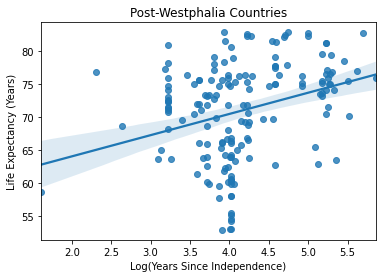

In [89]:
import seaborn as sns
sns.regplot(x='log_yrs_since_ind', y='life_exp', data=tw_df)
plt.title("Post-Westphalia Countries")
plt.xlabel("Log(Years Since Independence)")
plt.ylabel("Life Expectancy (Years)")
plt.show()

In [92]:
!jupyter nbconvert Week_09.ipynb --to slides --SlidesExporter.reveal_scroll=True

[NbConvertApp] Converting notebook Week_09.ipynb to slides
[NbConvertApp] Writing 489582 bytes to Week_09.slides.html
